SALES FORECASTING

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/Train.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Preprocessing

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)
data

/tmp/ipython-input-8-1629666940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
/tmp/ipython-input-8-1629666940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
sum(data['Item_Visibility'] == 0)

526

In [ ]:
data['Item_Visibility'].replace([0],[data['Item_Visibility'].mean()],inplace = True)
data

/tmp/ipython-input-10-3674386383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Visibility'].replace([0],[data['Item_Visibility'].mean()],inplace = True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<Axes: >

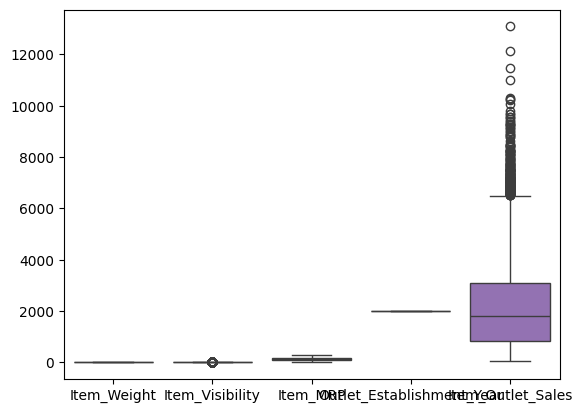

In [ ]:
sns.boxplot(data)

In [ ]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

Q1 = data['Item_Weight'].quantile(0.25)
Q3 = data['Item_Weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

data['Item_Weight'] = data['Item_Weight'].clip(lower_bound,upper_bound)

In [ ]:
Q1 = data['Item_Visibility'].quantile(0.25)
Q3 = data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

data['Item_Visibility'] = data['Item_Visibility'].clip(lower_bound,upper_bound)

In [ ]:
Q1 = data['Item_MRP'].quantile(0.25)
Q3 = data['Item_MRP'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

data['Item_MRP'] = data['Item_MRP'].clip(lower_bound,upper_bound)

In [ ]:
Q1 = data['Item_Outlet_Sales'].quantile(0.25)
Q3 = data['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].clip(lower_bound,upper_bound)

<Axes: >

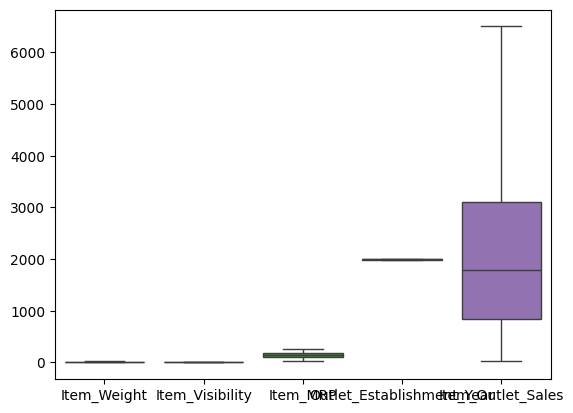

In [ ]:
sns.boxplot(data)

Data Consistency and Feature Engineering

In [ ]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg': 'Regular'})
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
data['New_Item_Type'] = data['Item_Identifier'].str[:2]
data['New_Item_Type'] = data['New_Item_Type'].map({'FD': 'Food','NC': 'Non-Consumables','DR': 'Drinks'})
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumables
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumables
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food


Data Visualization

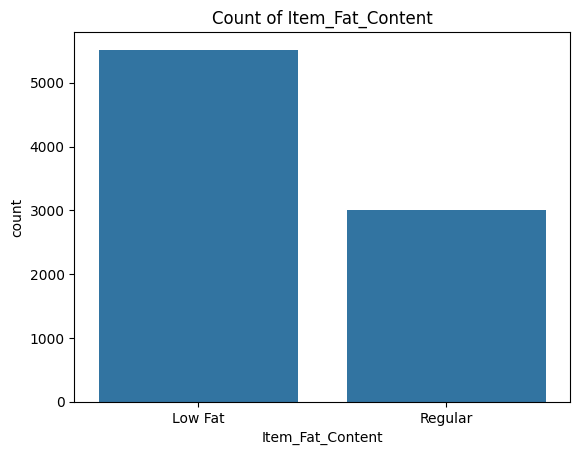

In [ ]:
sns.countplot(x='Item_Fat_Content', data=data)
plt.title('Count of Item_Fat_Content')
plt.show()

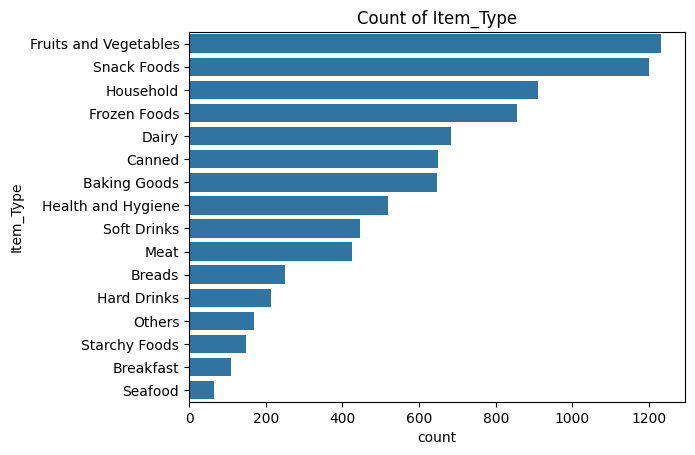

In [ ]:
sns.countplot(y='Item_Type', data=data, order=data['Item_Type'].value_counts().index)
plt.title('Count of Item_Type')
plt.show()

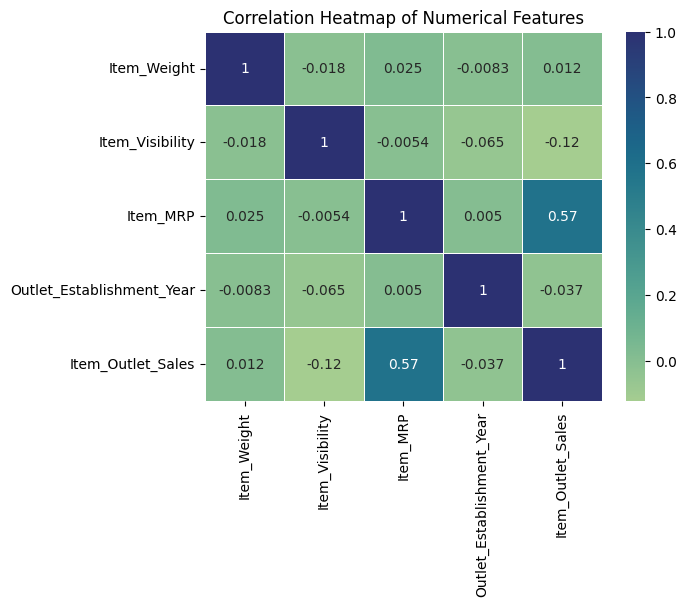

In [ ]:
corr = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

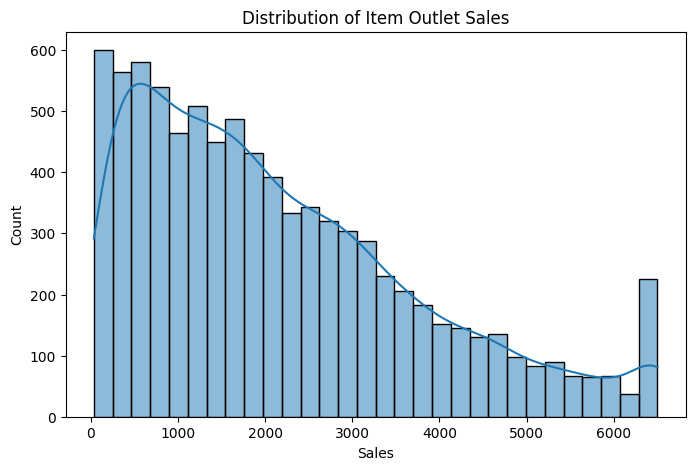

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['Item_Outlet_Sales'], kde=True, bins=30)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales')
plt.show()


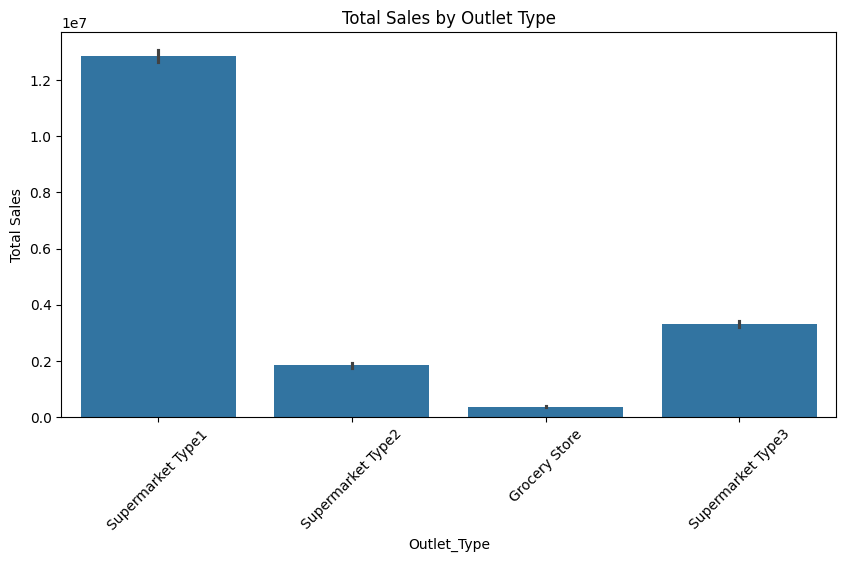

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, estimator=sum)
plt.title('Total Sales by Outlet Type')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

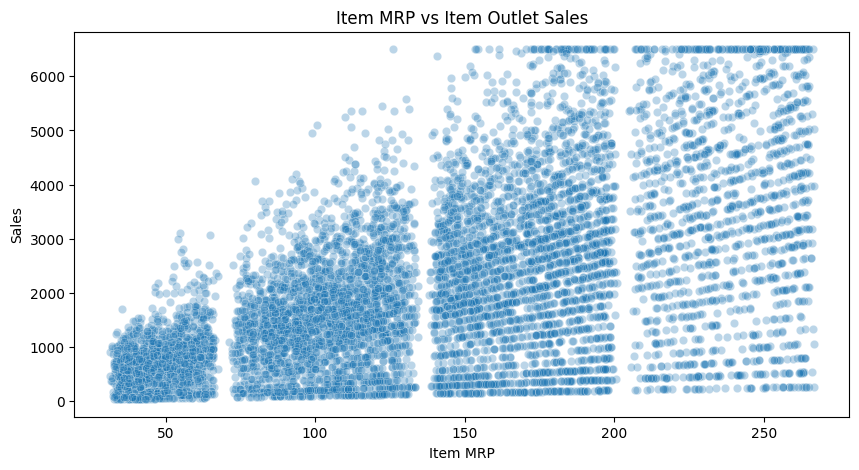

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data, alpha=0.3)
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.show()


Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,9
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,9
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,0
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumables,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food,7
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumables,6
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,3


In [ ]:
data.drop('Item_Identifier', axis=1, inplace=True)
data.drop('Outlet_Identifier', axis=1, inplace=True)
data.drop('Item_Type', axis=1, inplace=True)
data.drop('Outlet', axis=1, inplace=True)
data.drop('Outlet_Establishment_Year', axis=1, inplace=True)
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,19.200,Regular,0.066132,182.0950,Medium,Tier 3,Grocery Store,732.3800,Food
4,8.930,Low Fat,0.066132,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non-Consumables
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,Food
8519,8.380,Regular,0.046982,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,Food
8520,10.600,Low Fat,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumables
8521,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,Food


In [ ]:
data=pd.get_dummies(data,columns =['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype=int)
data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumables
0,9.300,0.016047,249.8092,3735.1380,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,443.4228,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,2097.2700,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,182.0950,732.3800,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,53.8614,994.7052,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,108.1570,549.2850,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,85.1224,1193.1136,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,103.1332,1845.5976,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0


Model Training and Evaluation

In [ ]:
num_cols= ['Item_Weight', 'Item_Visibility', 'Item_MRP']
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd =StandardScaler()
data_scaled = data.copy()
data_scaled[num_cols] = sd.fit_transform(data[num_cols])
data_scaled

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumables
0,-0.841872,-1.170268,1.747454,3735.1380,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,-1.641706,-1.099160,-1.489023,443.4228,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,1.098554,-1.154581,0.010040,2097.2700,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,1.500838,-0.067985,0.660050,732.3800,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,-0.929428,-0.067985,-1.399220,994.7052,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.273734,1.180783,2778.3834,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
8519,-1.059578,-0.489436,-0.527301,549.2850,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
8520,-0.534243,-0.749050,-0.897208,1193.1136,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
8521,-1.336444,1.672624,-0.607977,1845.5976,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
y=data_scaled['Item_Outlet_Sales']
x=data_scaled.drop(columns=['Item_Outlet_Sales'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5966, 18) (2557, 18) (5966,) (2557,)


In [ ]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr=LinearRegression()
lr_model = lr.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

print("R2 Score:",r2_score(y_test, lr_pred))
print("MAE:",mean_absolute_error(y_test, lr_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, lr_pred)))


R2 Score: 0.5823841678321772
MAE: 785.3612073966962
RMSE: 1034.0166972846382


In [ ]:
#KNeighborsRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
metric_k=[]
for k in range(1,20):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn_model = knn.fit(x_train, y_train)
  knn_pred = knn_model.predict(x_test)
  r2 = r2_score(y_test, knn_pred)
  metric_k.append(r2)
metric_k

[0.20794308828344465,
 0.4083522058565414,
 0.4789440360179614,
 0.5036029708975349,
 0.5237490689599151,
 0.5383540124369187,
 0.5464482096321339,
 0.5546552065636025,
 0.5581501490654959,
 0.5638248829370625,
 0.5672049634237475,
 0.5680453851681343,
 0.5723686135753756,
 0.5750054393691085,
 0.5763439724848238,
 0.5786138809700636,
 0.5810219177558387,
 0.5822053654220671,
 0.5821688596576329]

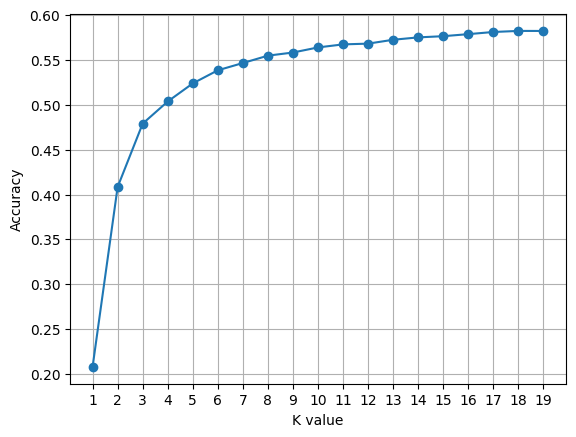

In [ ]:
plt.plot(range(1,20),metric_k,marker="o")
plt.grid()
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.xticks(range(1,20))
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

knn = KNeighborsRegressor(n_neighbors=19)
knn_model = knn.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

print("R2 Score:", r2_score(y_test, knn_pred))
print("MAE:", mean_absolute_error(y_test, knn_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, knn_pred)))

R2 Score: 0.5821688596576329
MAE: 758.8862897021592
RMSE: 1034.2832144308177


In [ ]:
#DecisionTreeRegression
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

print("R2 Score:", r2_score(y_test, dt_pred))
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))

R2 Score: 0.2006534391571091
MAE: 1019.7264691435277
RMSE: 1430.5618191163526


In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = rf.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

print("R2 Score:", r2_score(y_test, rf_pred))
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))

R2 Score: 0.5598650585219387
MAE: 755.2520617962457
RMSE: 1061.5293301917864


In [ ]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(LinearRegression(),param_grid,cv=5,scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'fit_intercept': True, 'positive': True}
0.5696157361763567


In [ ]:
lr=LinearRegression(fit_intercept=False, positive=False)
lr_model = lr.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

print("R2 Score:",r2_score(y_test, lr_pred))
print("MAE:",mean_absolute_error(y_test, lr_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, lr_pred)))

R2 Score: 0.5823841678321772
MAE: 785.3612073966964
RMSE: 1034.0166972846382


In [ ]:
data_scaled

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumables
0,-0.841872,-1.170268,1.747454,3735.1380,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,-1.641706,-1.099160,-1.489023,443.4228,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,1.098554,-1.154581,0.010040,2097.2700,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,1.500838,-0.067985,0.660050,732.3800,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,-0.929428,-0.067985,-1.399220,994.7052,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.273734,1.180783,2778.3834,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
8519,-1.059578,-0.489436,-0.527301,549.2850,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
8520,-0.534243,-0.749050,-0.897208,1193.1136,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
8521,-1.336444,1.672624,-0.607977,1845.5976,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
new_data = pd.DataFrame([{
    'Item_Weight': 6.0,
    'Item_Visibility': 0.12,
    'Item_MRP': 200.0,

    # Fat content
    'Item_Fat_Content_Low Fat': 1,
    'Item_Fat_Content_Regular': 0,

    # Outlet size
    'Outlet_Size_Medium': 1,
    'Outlet_Size_High': 0,
    'Outlet_Size_Small': 0,

    # Outlet location type
    'Outlet_Location_Type_Tier 1': 0,
    'Outlet_Location_Type_Tier 2': 1,
    'Outlet_Location_Type_Tier 3': 0,

    # Outlet type
    'Outlet_Type_Supermarket Type1': 1,
    'Outlet_Type_Supermarket Type2': 0,
    'Outlet_Type_Supermarket Type3': 0,
    'Outlet_Type_Grocery Store': 0,

    # New item type
    'New_Item_Type_Food': 1,
    'New_Item_Type_Drinks': 0,
    'New_Item_Type_Non-Consumables': 0

}])

# Reindex to match the columns of the training data and fill missing values with 0
new_data = new_data.reindex(columns=x_train.columns, fill_value=0)

In [ ]:
new_data_scaled = new_data.copy()
new_data_scaled[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = sd.transform(
    new_data[['Item_Weight', 'Item_Visibility', 'Item_MRP']]
)

In [ ]:
prediction = lr_model.predict(new_data_scaled)

print("Predicted Item Outlet Sales: ₹", round(prediction[0], 2))

Predicted Item Outlet Sales: ₹ 3156.73
